## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = study_results.merge(mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.

len(data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data.loc[data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
duplicate_mouse = duplicate_mouse.unique()
duplicate_mouse
# data.groupby('Drug Regimen').describe()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = data[data["Mouse ID"].isin(duplicate_mouse) == False] <---2nd way of doing below
clean_df = data[data["Mouse ID"] != "g989"]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# clean_df.groupby('Drug Regimen').describe(), .describe() function wouldn't seperate by drug regiments 

mean_drug = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_drug = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_drug = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_drug = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_drug = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({'Mean': mean_drug, 'Median': median_drug, 'Variance': variance_drug,
                          'Standard Deviation': std_drug, 'SEM': sem_drug})
summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

# This method produces everything in a single groupby function


C:\Users\Patrick\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

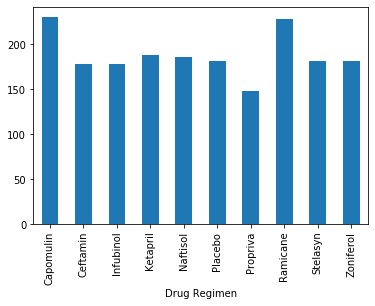

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = clean_df.groupby('Drug Regimen').count()["Mouse ID"]
mouse_count.plot(kind="bar")


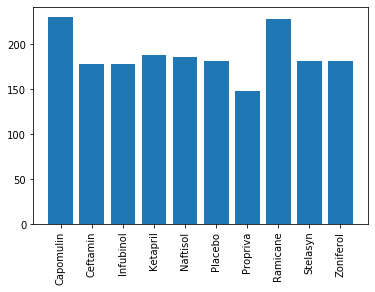

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count = clean_df.groupby('Drug Regimen').count()["Mouse ID"]
plt.bar(mouse_count.index,mouse_count.values)
plt.xticks(rotation=90)
plt.show()


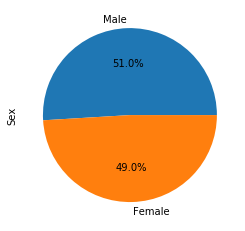

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df['Sex'].value_counts()
gender_count.plot(kind="pie", autopct='%1.1f%%')


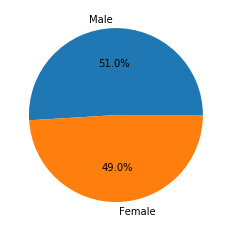

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_df['Sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%') 
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

regimen_df = clean_df[clean_df["Drug Regimen"].isin(regimens)]
regimen_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
    # utilize max function
max_timepoint = regimen_df.groupby('Mouse ID').max()["Timepoint"]
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint[["Mouse ID", "Timepoint"]], regimen_df, on = ["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
mouse_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

    
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


for mouse_treatment in mouse_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    drug_data = merged_df.loc[merged_df["Drug Regimen"] == mouse_treatment]["Tumor Volume (mm3)"]
    # add subset 
    tumor_volume.append(drug_data)
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{mouse_treatment} potential outliers: {drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]}")
  

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


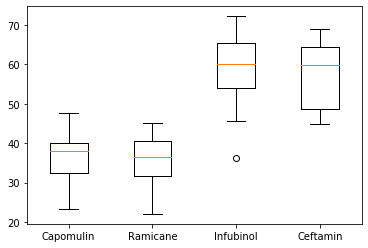

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = mouse_treatments)
plt.show()

## Line and Scatter Plots

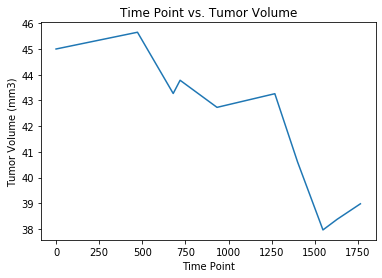

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#random mouse b128
capomulin_mouse = clean_df[clean_df["Mouse ID"] == "b128"]['Tumor Volume (mm3)']
capomulin_mouse.plot()
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Time Point vs. Tumor Volume')
plt.show()

In [18]:
all_capomulin_mice_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
all_capomulin_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


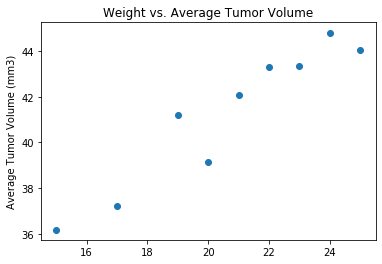

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_tumor_capomulin_df = all_capomulin_mice_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
plt.scatter(weight_tumor_capomulin_df.index, weight_tumor_capomulin_df)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient
st.pearsonr(weight_tumor_capomulin_df.index, weight_tumor_capomulin_df)

(0.9505243961855265, 8.449451040646492e-05)

slope: 0.894773    intercept: 22.764230
R-squared: 0.903497


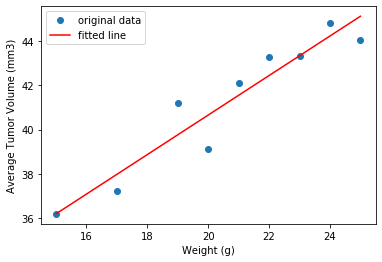

In [21]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x = weight_tumor_capomulin_df.index
y = weight_tumor_capomulin_df

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.legend()
plt.show()